### Topics 

- Assumptions of Machine Learning 
- Polynomial Regression
- multi coliniarity
- Under fitting and Overfitting
- Bias -Variance Tradeoff
- Cross Validation

### Multiple Linear Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [7]:
data = fetch_california_housing()
data
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
#data
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df.drop("Price", axis = 1)
y = df['Price']


In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:

print(model.coef_)
print(len(model.coef_))

[ 0.83265521  0.12186056 -0.2692169   0.31217484 -0.00634786 -0.04074974
 -0.90369005 -0.8787625 ]
8


In [ ]:
y_pred = model.predict(X_test)

In [20]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

mean_absolute_error(y_test, y_pred)
mean_absolute_error(y_test, y_pred)

np.float64(0.5352476763196591)

# assumption In Linear Regression

- Homoscedasticity

The variance of residuals should be approximately equal for all predicted values of the dependent variable.

- Normality - Errors are normally distributed

The residuals should be normally distributed.Linear relationship

There is a linear relationship between the dependent and independent variables

The error terms are normally distributed and the data do not contain outliers

- Independence of errors

The residual errors are independent of each other. 

- No or low multicollinearity

There is no or little collinearity among input variables

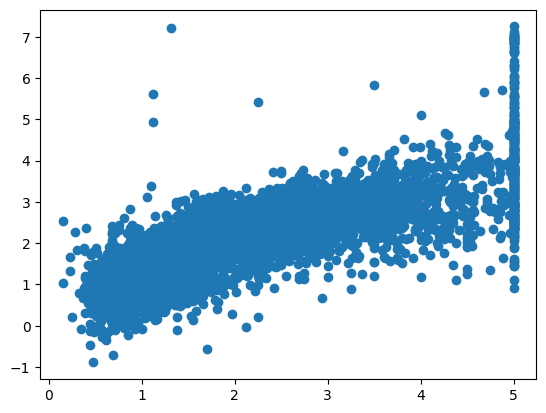

In [23]:
#assumption   1. distributions bw errors are linear
plt.scatter(y_test, y_pred)

C:\Users\hp\AppData\Local\Temp\ipykernel_25368\381831063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Price', ylabel='Density'>

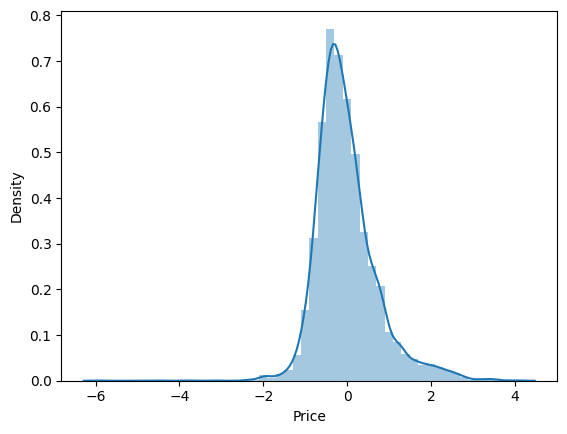

In [25]:
# 2. error are normaly distributed
import seaborn as sns
error = y_test-y_pred
sns.distplot(error)

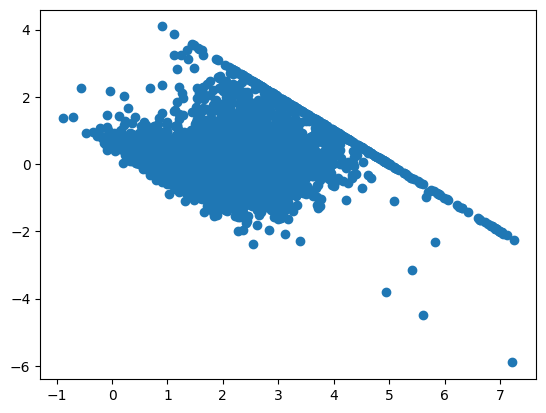

In [26]:
# 3. 
plt.scatter(y_pred, error)   # Plot the predicted values against the error homodacity


#### MultiColiniarity
(optional)

- What it is

Multicollinearity occurs when independent variables are correlated, which can make it difficult to estimate each variable's relationship with the outcome variable. 

- Why it's a problem

Multicollinearity can negatively impact model predictions on unseen data, and can make it difficult to explain the model's behavior. 

- How to detect it

A correlation matrix can help identify multicollinearity, but a heatmap of correlations can be more intuitive. A variance inflation factor (VIF) can also be used to measure the amount of multicollinearity. 

- How to address it

If multicollinearity is detected, it can be addressed by using a VIF to identify the correlated variables, and then removing or transforming those variables

In [47]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target

<Axes: >

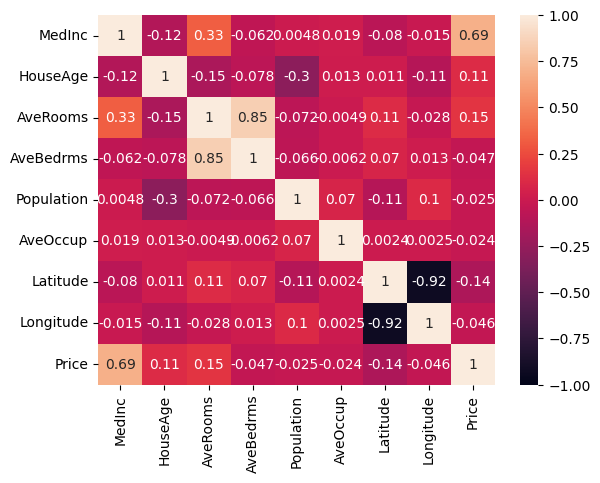

In [49]:
#multicollinearity>> when one feature is explained by all other features
#when two features>> correlation
#more than two features>> vif, clustermap

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)


<Figure size 500x500 with 0 Axes>

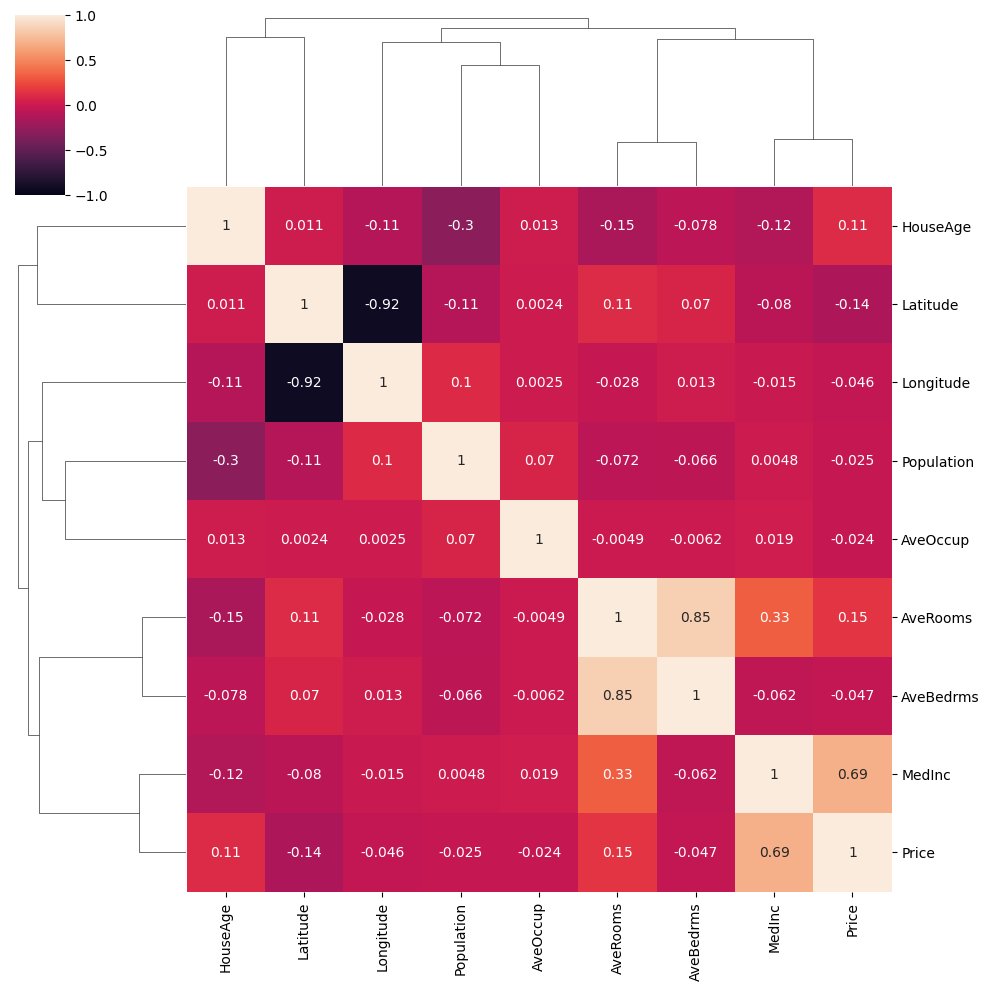

In [50]:
#clustermap table shows group(cluster ) relationship
plt.figure(figsize = (5, 5))
sns.clustermap(df.corr(), vmin = -1, vmax =1, annot = True)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif

vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [52]:
df1 = df.copy()

df1.drop("Longitude", axis=1, inplace=True)
df1
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [53]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [54]:
df1.drop("AveRooms", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [55]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [56]:
df1.drop("Latitude", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [ ]:
df1.drop("Latitude", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [58]:
df1
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# and then train  the model


In [59]:
#RFE >> recruseive feature elimination
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(), n_features_to_select=6)

rfe.fit(X, y)

rfe.predict(X)

rfe.support_

X.columns

rfe.ranking_


array([1, 1, 1, 1, 3, 2, 1, 1])

# Polynomial Regression
Polynomial regression is a type of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled using a polynomial equation. The degree of the polynomial is determined by the number
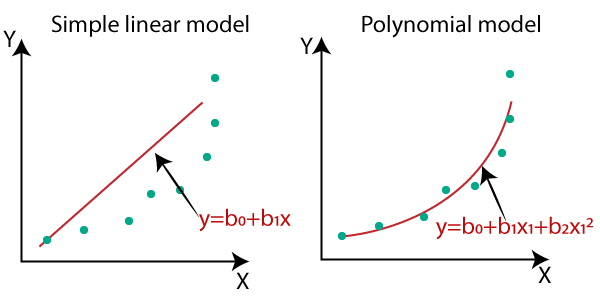

- https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
- https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/  implementations

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

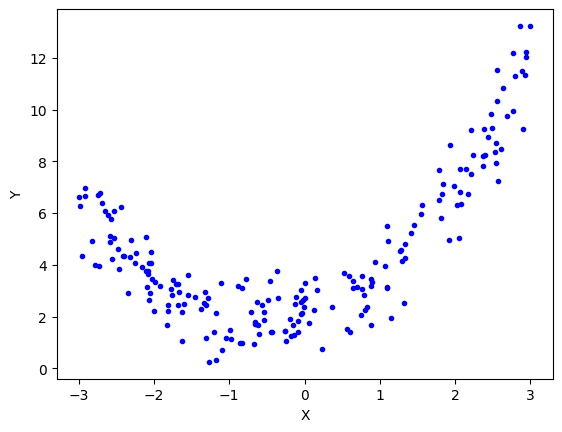

In [61]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [63]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=43)

0.1721514528647713


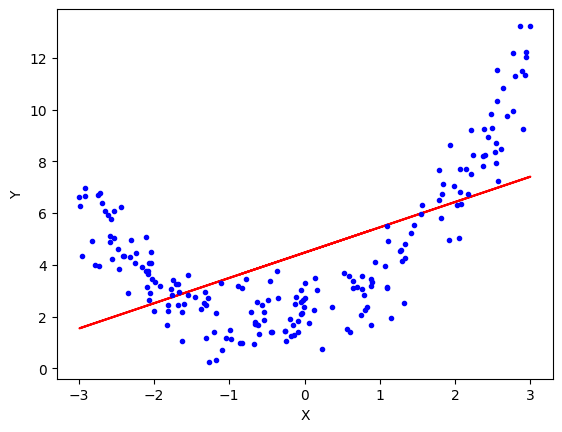

In [64]:
# Simple linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [66]:
# polynomial Regression
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

print(lr.coef_)
print(lr.intercept_)



0.885897855957501
[[0.         0.9123559  0.79380177]]
[1.97254213]


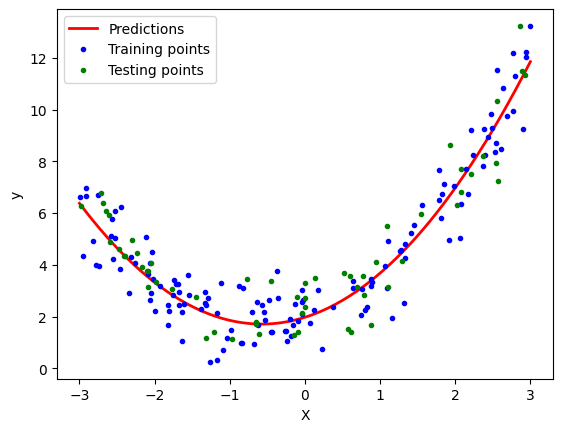

In [67]:

# image show 
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## END

## Next will learn

- Regularization
- Underfitting and Overfitting
- bias variance 
- bias -variance tradeoff
- Cross Validation